In [1]:
import pandas as pd
import numpy as np
from google.colab import files
import io
from tqdm import tqdm

In [2]:
uploaded=files.upload()

Saving ADV2.csv to ADV2.csv


In [3]:
data=pd.read_csv(io.BytesIO(uploaded['ADV2.csv']))

In [4]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
from sklearn.feature_selection import RFE 
from sklearn.svm import SVR


In [6]:
feature_cols=['TV','Radio','Newspaper']

In [7]:
# Señalar cuales son X y cuales son Y, donde X es la matriz de caracteristicas, Y son las etiquetas.
X=data[feature_cols]
Y=data['Sales']

In [8]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [9]:
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [15]:
estimator= SVR(kernel="linear")
selector= RFE(estimator, n_features_to_select=2,step=1)
selector= selector.fit(X,Y)

In [16]:
selector.support_

array([ True,  True, False])

In [18]:
selector.ranking_

array([1, 1, 2])

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
X_pred=X[['TV','Radio']]

In [22]:
lm= LinearRegression()
lm.fit(X_pred,Y)

LinearRegression()

In [25]:
lm.intercept_

2.9210999124051362

In [26]:
lm.score(X_pred,Y)

0.8971942610828957

In [27]:
sales_pred=lm.predict(X_pred)

In [28]:
sales_pred

array([20.55546463, 12.34536229, 12.33701773, 17.61711596, 13.22390813,
       12.51208449, 11.71821241, 12.10551553,  3.7093792 , 12.55169696,
        7.0358597 , 17.25652015, 10.60866187,  8.81095051, 18.44466773,
       20.82891539, 12.90386507, 23.24107626,  9.94121476, 14.15384619,
       18.12139161, 14.74206357,  6.51417168, 16.54402663,  8.14035215,
       15.6080206 , 14.96769383, 17.0463346 , 19.39954145,  9.15929748,
       21.64292187, 11.35791808,  7.65045928, 18.83346334,  7.56302763,
       16.99280099, 23.36720719, 15.6258994 ,  9.91257829, 20.4405801 ,
       16.37872122, 17.29870935, 21.5621537 , 13.96692266,  8.9009974 ,
       15.16263814,  8.88644967, 21.69944046, 16.28690268,  8.18162949,
       12.64569407,  9.31962792, 20.66180115, 19.96126242, 20.35512357,
       21.30864743,  8.53774783, 12.76239488, 21.89072858, 18.10746914,
        5.74497097, 22.90418658, 16.78413768, 13.18474853, 16.96570907,
        7.82652846,  8.98703456, 12.02066194, 18.95313425, 21.09

SVM para regresión no lineal 

In [29]:
import matplotlib.pyplot as plt


In [51]:
X=np.sort(5*np.random.rand(200,1),axis=0)
Y=np.sin(X).ravel()
Y[::5] += 3*(0.5 - np.random.rand(40))

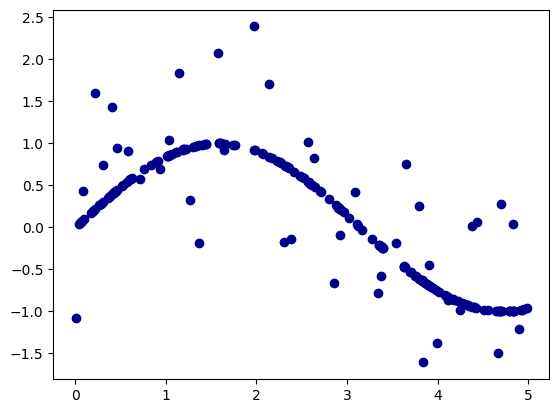

In [52]:
plt.scatter(X,Y,color="darkblue",label="data")

In [46]:
#Cargo de la librería de máquinas de vectores de soporte, el modelo de regresión por vectores.
from sklearn.svm import SVR

In [53]:
#El parametro C es el parametro de regularización de la SVR 
C=1e3

In [70]:
#Modelos de regresión diferentes 
svr_lin=SVR(kernel="linear",C=C)
svr_rbf=SVR(kernel="rbf",C=100, gamma=0.1)
svr_pol=SVR(kernel="poly",C=10,degree=2)

In [71]:
y_lin=svr_lin.fit(X,Y).predict(X)
y_rbf=svr_rbf.fit(X,Y).predict(X)
y_pol=svr_pol.fit(X,Y).predict(X)

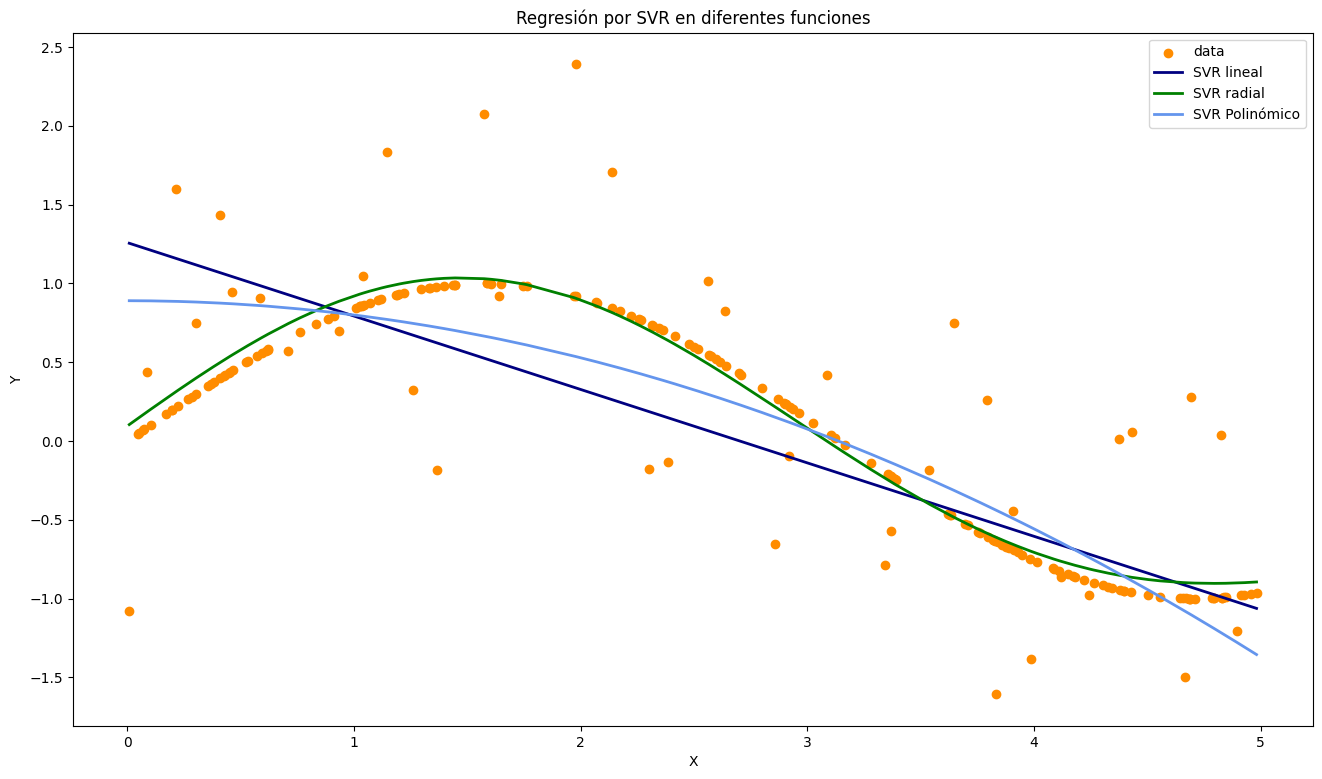

In [73]:
lw=2
plt.figure(figsize=(16,9))
plt.scatter(X,Y,color="darkorange",label="data")
plt.plot(X, y_lin,color="navy",lw=lw,label="SVR lineal")
plt.plot(X,y_rbf,color="green",lw=lw,label="SVR radial")
plt.plot(X,y_pol,color="cornflowerblue",lw=lw,label="SVR Polinómico")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Regresión por SVR en diferentes funciones")
plt.legend()
plt.show()

In [74]:
uploaded=files.upload()

Saving diab.csv to diab.csv


In [75]:
data=pd.read_csv(io.BytesIO(uploaded['diab.csv']))

In [76]:
data

,Edad,label,Tension SISTOLICA,Tension DIASTOLICA,Colesterol Total,Colesterol HDL,Trigliceridos,Colesterol LDL,Rframingham,Hemoglobina A1C,Glicemia de ayuno,IMC,Creatinina,Factor correcion formula,Calculo de TFG corregida (Cockcroft-Gault),Estatina,Antidiabeticos
0,68,0,120,80,211,664.0,177,9965.0,1834996482,77.0,135.0,27,71.0,85,"68,23943662",0.0,3.0
1,62,1,150,100,252,80.0,54,146.0,15,79.0,207.0,21,85.0,1,70,0.0,4.0
2,62,1,100,60,199,69.0,147,101.0,8570634656,61.0,108.0,26,104.0,85,"51,35416667",0.0,2.0
3,54,1,100,70,184,607.0,164,905.0,4911267001,72.0,105.0,21,11.0,1,"56,46464646",0.0,2.0
4,64,1,140,90,196,528.0,128,1146.0,2101260353,93.0,217.0,28,1.0,85,57,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,78,0,120,80,198,41.0,219,113.0,26,67.0,119.0,30,8.0,85,59,0.0,0.0
93,57,0,120,70,182,28.0,214,111.0,3330971915,66.0,157.0,39,57.0,85,141,0.0,3.0
94,62,0,120,85,203,395.0,146,126.0,2115473746,72.0,86.0,27,104.0,85,44,0.0,0.0
95,74,0,130,85,190,67.0,106,116.0,7483066676,74.0,155.0,28,78.0,85,64,1.0,1.0


In [78]:
from sklearn import preprocessing, neighbors
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [80]:
train,test= train_test_split(data,test_size=0.2)

In [81]:
train 

,Edad,label,Tension SISTOLICA,Tension DIASTOLICA,Colesterol Total,Colesterol HDL,Trigliceridos,Colesterol LDL,Rframingham,Hemoglobina A1C,Glicemia de ayuno,IMC,Creatinina,Factor correcion formula,Calculo de TFG corregida (Cockcroft-Gault),Estatina,Antidiabeticos
33,56,1,140,90,104,491.0,141,367.0,1814225728,69.0,83.0,27,104.0,85,"56,66666667",0.0,0.0
5,71,1,140,70,134,511.0,139,100.0,22,78.0,119.0,26,1.0,85,41,0.0,2.0
27,86,0,110,70,229,54.0,195,126.0,4542247811,84.0,118.0,28,113.0,1,"55,16224189",0.0,3.0
10,45,1,110,70,191,646.0,101,1062.0,3371350947,6.0,100.0,29,93.0,85,"82,0041816",0.0,4.0
25,46,1,120,80,185,634.0,150,916.0,4,88.0,158.0,35,76.0,85,"121,3486842",0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,35,0,120,70,181,72.0,91,908.0,2,68.0,116.0,23,73.0,85,45,0.0,2.0
91,76,0,120,80,229,60.0,140,141.0,1316764552,92.0,236.0,31,76.0,85,"80,46418129",0.0,2.0
75,78,0,120,80,204,775.0,119,1027.0,2582603129,76.0,176.0,24,67.0,1,70,0.0,1.0
43,61,1,150,90,231,511.0,290,1219.0,2367219843,10.0,185.0,23,1.0,85,49,0.0,2.0


In [82]:
test

,Edad,label,Tension SISTOLICA,Tension DIASTOLICA,Colesterol Total,Colesterol HDL,Trigliceridos,Colesterol LDL,Rframingham,Hemoglobina A1C,Glicemia de ayuno,IMC,Creatinina,Factor correcion formula,Calculo de TFG corregida (Cockcroft-Gault),Estatina,Antidiabeticos
29,71,1,140,80,218,661.0,60,1399.0,3744537312,88.0,99.0,26,71.0,85,"99,2165493",1.0,2.0
9,73,1,140,100,133,51.0,76,668.0,2380744501,77.0,141.0,25,88.0,85,"50,33459596",0.0,3.0
2,62,1,100,60,199,69.0,147,101.0,8570634656,61.0,108.0,26,104.0,85,"51,35416667",0.0,2.0
42,80,1,140,80,204,632.0,120,1168.0,38,73.0,119.0,33,77.0,85,64,0.0,2.0
66,56,0,120,80,240,62.0,260,125.0,114548415,92.0,331.0,31,127.0,85,"46,8503937",0.0,2.0
50,89,1,120,80,195,625.0,191,1129.0,6333862573,79.0,132.0,24,13.0,1,50,1.0,6.0
39,58,1,140,80,175,532.0,485,70.0,1337872866,101.0,178.0,24,7.0,85,111,0.0,3.0
40,59,1,130,80,234,559.0,184,1563.0,1664406179,79.0,110.0,35,1.0,85,71,0.0,2.0
87,82,0,170,110,196,52.0,129,116.0,17,99.0,262.0,30,74.0,85,139,0.0,2.0
31,67,1,140,80,218,487.0,111,1471.0,28,71.0,116.0,29,97.0,85,70,0.0,3.0


In [85]:
X_train=train[['Edad','Tension SISTOLICA','Tension DIASTOLICA','Colesterol HDL','Colesterol LDL']]
Y_train=train['label']
X_test=test[['Edad','Tension SISTOLICA','Tension DIASTOLICA','Colesterol HDL','Colesterol LDL']]
Y_test=test['label']

In [86]:
X_train

,Edad,Tension SISTOLICA,Tension DIASTOLICA,Colesterol HDL,Colesterol LDL
33,56,140,90,491.0,367.0
5,71,140,70,511.0,100.0
27,86,110,70,54.0,126.0
10,45,110,70,646.0,1062.0
25,46,120,80,634.0,916.0
...,...,...,...,...,...
80,35,120,70,72.0,908.0
91,76,120,80,60.0,141.0
75,78,120,80,775.0,1027.0
43,61,150,90,511.0,1219.0


In [90]:
len(Y_test)

20

In [91]:
clf=neighbors.KNeighborsClassifier(n_neighbors=5)

In [92]:
clf.fit(X_train,Y_train)

KNeighborsClassifier()

In [93]:
clf.score(X_test,Y_test)

0.9